# Image Recogniser Model

# 1. Overview:

#### 1.1 Team:
- Emma
- Raphael

#### 1.2 Topic:
**Garbage Image Classification**
##### 1.2.1 Objective:
- Build model to classify different types of garbage (recycable, non-recycable) 
    - MVP: linear classifier, SVM, DF or pretrained CNN
    - next level: self trained CNN
- Dive into CNN
- optional: create APP

##### 1.2.2 Data:
Collected by Gary Thung and Mindy Yang.
The Dataset contains 2527 images of six classes of garbage deployed on plain background:
 - 501 glass
 - 594 paper
 - 403 cardboard
 - 482 plastic
 - 410 metal
 - 137 trash


##### 1.2.3 Link to the Dataset:
https://github.com/garythung/trashnet/blob/master/data/dataset-resized.zip


## 2. Import libraries <a name="2"></a>
Import necessary libraries for data-handling, plotting, modeling.
[↑ back to top ↑](#index)

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
import pytorch_lightning
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 3. Load data <a name="3"></a>
[↑ back to top ↑](#index)

#### 3.1 Load and transform data:

In [37]:
data_transformer = transforms.Compose([transforms.RandomResizedCrop(224), 
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                        ])

data_set = datasets.ImageFolder(root='data/dataset-resized', transform=data_transformer)

loader = torch.utils.data.DataLoader(data_set, batch_size=8, shuffle=True)

test_set, valid_set = torch.utils.data.random_split(data_set, (1769, 758))

labels = data_set.classes

In [62]:
loader

#### 3.2 Visualise images

In [38]:
inputs, classes = next(iter(loader))

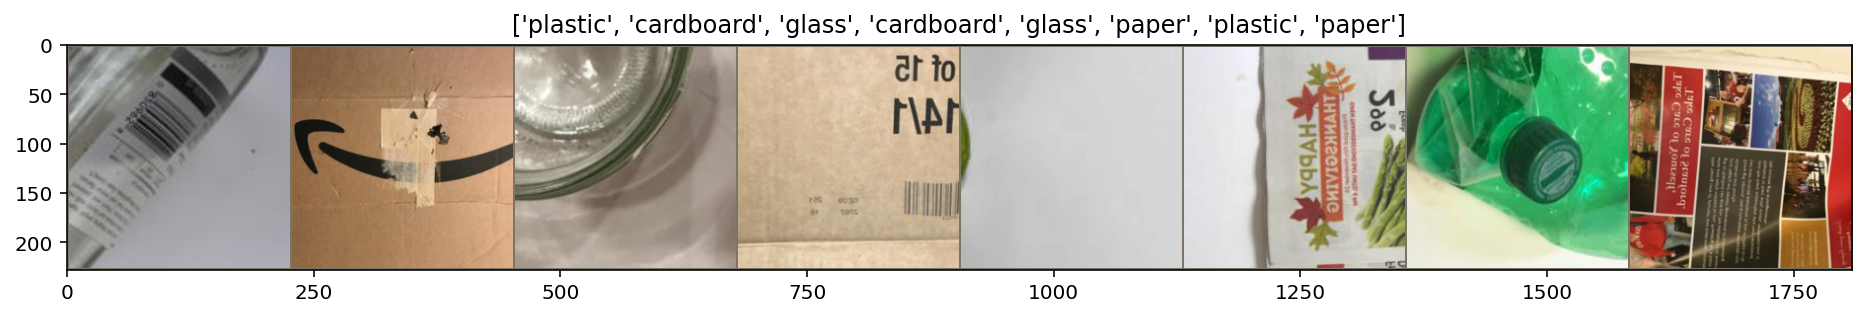

In [42]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(16,16))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(loader))

# Make a grid from batch
batch_grid = torchvision.utils.make_grid(inputs)

imshow(batch_grid, title=[labels[x] for x in classes])


## 4. Create model <a name="4"></a>
[↑ back to top ↑](#index)

In [44]:
model = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/EMMA/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100.0%


## 5. Train model <a name="5"></a>
Improve the training of the model using our own data set.
[↑ back to top ↑](#index)

In [55]:
# tuning parameters
learn_rate = 1e-3
epochs = 3

In [56]:
# Initialise the loss function
loss = nn.CrossEntropyLoss() # combination of mse and negative log likelihood

In [57]:
optimiser = torch.optim.SGD(model.parameters(), lr=learn_rate)

In [67]:
def training_loop(loader, model, loss, optimiser):
    
    size = len(loader.dataset)
    for batch, (X, y) in enumerate(loader):
        
        pred = model(X)
        loss = loss(pred, y)
        
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            return loss, current
    
    

In [68]:
training_loop(loader, model, loss, optimiser)

(9.44096565246582, 0)

## 6. Visualise model predictions <a name="6"></a>
Import necessary libraries for data-handling, plotting, modeling.
[↑ back to top ↑](#index)

## 7. Tune parameters <a name="7"></a>
Import necessary libraries for data-handling, plotting, modeling.
[↑ back to top ↑](#index)

## 8. Execute and evaluate <a name="8"></a>
Import necessary libraries for data-handling, plotting, modeling.
[↑ back to top ↑](#index)

## 9. Create predictor function<a name="9"></a>
Import necessary libraries for data-handling, plotting, modeling.
[↑ back to top ↑](#index)